In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
data = pd.read_csv('week3_challenge.csv', index_col=0)
data. head()

,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,...,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id
0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,Declined,...,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57000,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a
1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,Declined,...,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN
2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,Declined,...,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN
3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,Declined,...,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,NC_NGA_V2,394.94000,Decline,18a,da360fe9-8e86-4031-afb9-2143a3f734ee
4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,Declined,...,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7,RC_NGA_V1L,423.70578,Decline,NaN,NaN


In [3]:
data1 = data.copy()
#Dropiing columns without at least 8395 data points i.e 70% are non-nan values
data2 = data1.dropna(axis=1, thresh=8395)
print(data2.shape)

(11993, 271)


In [4]:
#select only numeric columns

data3 = data2.select_dtypes(include=[np.number])
print(data3.shape)

(11993, 248)


In [5]:
#to fill all NAN with 0

data3.fillna(0,inplace=True)
data3.head()

C:\Users\maria\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,...,callFeatures_vol_calls_1_mnth_out,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome
0,201812,334043596,302881418623,1,200000.0,0.0,200000.0,1.0,28.0,0.0,...,655.0,0.0,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499
1,201809,524284563,302328949395,4,80000.0,0.0,100000.0,1.0,33.0,0.0,...,2923.0,0.0,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891
2,201810,481582700,302536536368,2,39500.0,0.0,50000.0,2.0,26.0,0.0,...,1115.0,0.0,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277
3,201812,234330495,302887567434,1,50000.0,0.0,50000.0,1.0,36.0,1.0,...,58.0,50.0,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832
4,201901,563455515,303057983993,2,20000.0,0.0,75000.0,3.0,28.0,3.0,...,1474.0,0.0,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467


In [6]:
#lets remove the first three columns they seem less relevant to our clustering
data4 = data3.iloc[:, 3:]
print(data4.shape)

(11993, 245)


In [7]:
#to scale the numeric values

x = data4.loc[:,:].values
x = StandardScaler().fit_transform(x)

In [8]:
#pd.DataFrame(data = x, columns = [columns]).head()
pd.DataFrame(data = x).head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.389585,2.488673,0.0,0.964747,-1.243848,-0.222474,-0.648491,0.488025,2.247432,0.009235,...,0.016726,-0.218086,-0.113863,0.075120,0.792418,0.703710,0.543044,0.004773,-0.006009,2.802797
1,2.823083,0.541326,0.0,0.082888,-1.243848,0.443094,-0.648491,0.235318,0.050359,0.009230,...,1.841329,-0.218086,-0.113863,0.127209,0.709694,0.667245,2.471878,1.408808,1.776958,-0.149962
2,0.681305,-0.115904,0.0,-0.358041,-0.386424,-0.488701,-0.648491,-0.129878,-0.136774,0.009212,...,0.386796,-0.218086,-0.113863,0.232974,-2.049741,-2.070640,0.543044,0.507306,0.355615,-0.975365
3,-0.389585,0.054489,0.0,-0.358041,-1.243848,0.842434,0.170522,-0.129878,0.142770,0.008628,...,-0.463560,0.348488,-0.113863,-0.074673,0.147992,0.250177,-0.411114,-0.417965,-0.436028,0.615854
4,0.681305,-0.432348,0.0,-0.137577,0.471001,-0.222474,1.808549,-0.129878,-0.226874,0.008966,...,0.675611,-0.218086,-0.113863,0.015246,0.654783,0.731075,0.286550,0.449582,0.637840,-0.267489


## PCA

In [9]:
# create pca
pca = PCA(n_components=5)

In [10]:
# fit the data to the model
principalComponents = pca.fit_transform(x)

In [11]:
# create dataframe containing principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4', 'principal component 5'])

In [12]:
# display principal components
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.221909,-2.273156,0.760809,-1.595706,4.226088
1,13.461862,-3.655075,-2.135398,-0.890569,-0.204470
2,5.898813,-2.348909,0.101638,0.483877,0.256985
3,-1.883405,1.373125,-0.209396,3.304525,0.288002
4,2.635306,1.729701,0.546533,-2.891157,-0.892884


In [13]:
pca.explained_variance_ratio_

array([0.3553984 , 0.0941872 , 0.03832466, 0.03382516, 0.02766936])

In [14]:
pca.explained_variance_ratio_.sum()

0.5494047776089314

In [15]:
principalDf = principalDf.as_matrix(columns= ['principal component 1', 'principal component 2','principal component 3','principal component 4', 'principal component 5'])

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## K-MEANS CLUSTERING

In [16]:
# declare a Kmeans instance with 3 classes
model = KMeans(n_clusters=3)

In [17]:
# fit data 
model.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
# get clusters
clusters = model.predict(principalDf)

In [19]:
#print(model.labels_) 
print(clusters)

[0 2 0 ... 0 0 0]


In [20]:
#What are the cluster center vectors? first row contains values for the coordinates of the first centroid , the second row contains values for the coordinates of the other centroid i
model.cluster_centers_

array([[-1.88362589e+00,  3.08427065e-02, -1.81761408e-02,
         3.51751183e-02,  5.09611533e-03],
       [ 1.10778545e+02, -5.64192907e+00, -4.90307183e+00,
         6.64483477e-01,  5.92196804e-01],
       [ 1.95435268e+01, -1.60691160e-01,  4.37133341e-01,
        -4.78709615e-01, -8.99944465e-02]])

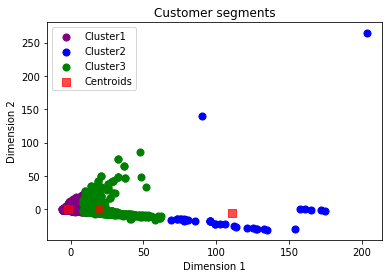

In [21]:
y_means = model.fit_predict(principalDf)

#Visualizing the clusters for k=4
plt.scatter(principalDf[y_means==0,0],principalDf[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(principalDf[y_means==1,0],principalDf[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(principalDf[y_means==2,0],principalDf[y_means==2,1],s=50, c='green',label='Cluster3')


plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=50,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [22]:
#name the column cluster
df = DataFrame(clusters)
df.columns = ['cluster']
df.head()

,cluster
0,0
1,2
2,0
3,0
4,0


In [23]:
df['cluster'].value_counts()

0    11092
2      865
1       36
Name: cluster, dtype: int64

In [24]:
# MERGE THE CLUSTER COLUMN WITH THE ORIGINAL DATAFRAME

data5 = pd.concat([df,data1], axis=1)
data5.head()

,cluster,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id
0,0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,...,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57000,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a
1,2,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,...,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN
2,0,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,...,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN
3,0,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,...,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,NC_NGA_V2,394.94000,Decline,18a,da360fe9-8e86-4031-afb9-2143a3f734ee
4,0,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,...,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7,RC_NGA_V1L,423.70578,Decline,NaN,NaN


## EXPLORATORY DATA ANALYSIS


In [26]:
#Lets get basic statistics variables for customer's income
#f = {'Income':['sum','mean'], 'B':['prod']}
f = {'Income':['min', 'max','mean'],'predictedIncome':['mean']}
data5.groupby('cluster').agg(f)


Income                         predictedIncome
              min       max          mean            mean
cluster                                                  
0           18.50  801776.7  45873.975033    37594.733000
1        25000.00  300000.0  84844.563889    57441.201649
2           74.17  696986.0  54904.418173    43168.254559

In [27]:
#Lets get basic statistics variables for customer's ages
a = {'demofeatures_age_at_application_yrs':['min', 'max','mean']}
data5.groupby('cluster').agg(a)

demofeatures_age_at_application_yrs                  
                                        min    max       mean
cluster                                                      
0                                      17.0  147.0  29.499729
1                                      21.0   45.0  31.500000
2                                      19.0   57.0  31.863584

C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Density')

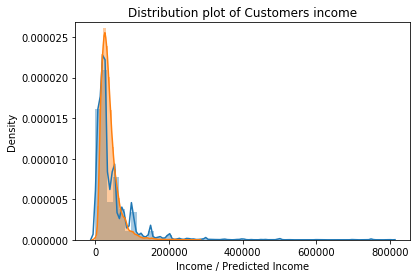

In [28]:
#Visualizing the data - displot
plot_income = sns.distplot(data3["Income"])
plot_spend = sns.distplot(data3["predictedIncome"])

plt.xlabel('Income / Predicted Income')
plt.title('Distribution plot of Customers income')
plt.ylabel('Density')

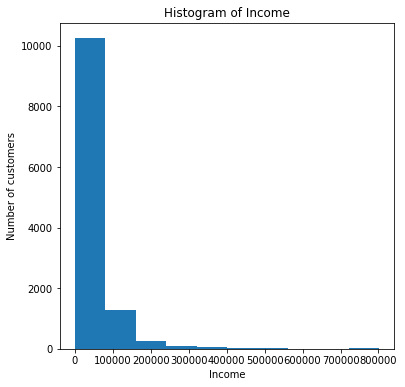

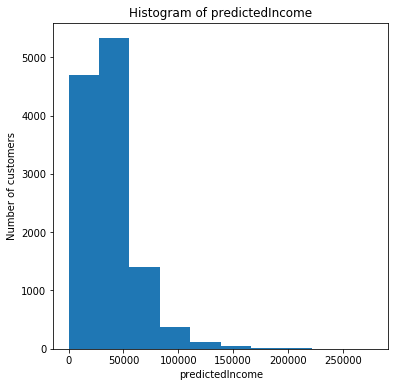

In [29]:
#lets visualize further with some histograms
def plot_histogram(incomes, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        data3[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['Income', 'predictedIncome']    
plot_histogram('incomes', num_cols)

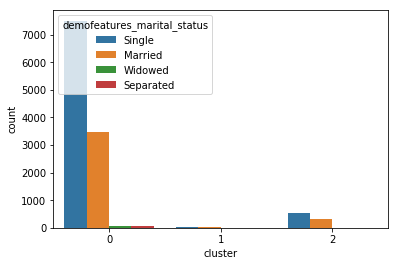

In [25]:
#sns.factorplot('Pclass',data=titanic_df,hue='Sex')
#df = sns.load_dataset('titanic')
#sns.countplot(x='survived',hue='class',data=df)
sns.countplot(x= 'cluster', hue= 'demofeatures_marital_status', data = data5)

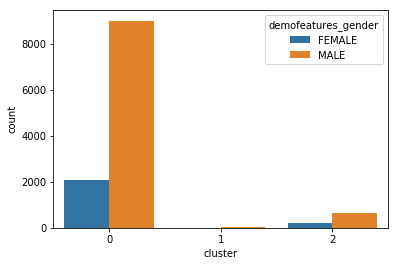

In [26]:
sns.countplot(x= 'cluster', hue= 'demofeatures_gender', data = data5)

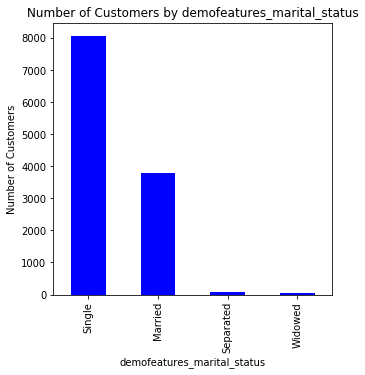

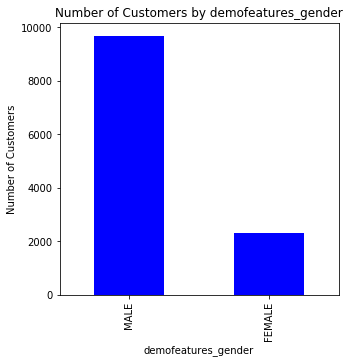

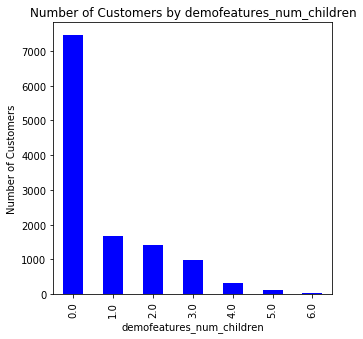

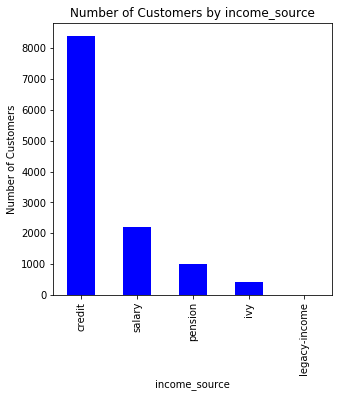

In [31]:
#Analysis of personal categorical information

def plot_bars(Customers, cols):
    for col in cols:
        fig = plt.figure(figsize=(5,5)) # define plot area
        ax = fig.gca() # define axis    
        counts = data5[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of Customers by' + ' ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Customers')# Set text for y axis
        plt.show()

plot_cols = ['demofeatures_marital_status','demofeatures_gender','demofeatures_num_children', 'income_source']
plot_bars('Customers', plot_cols)   

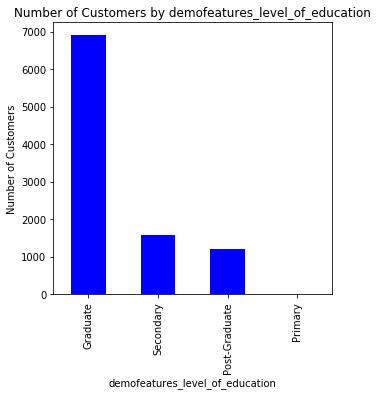

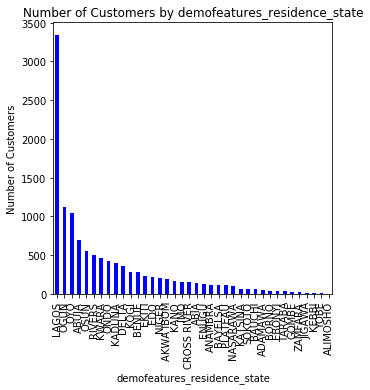

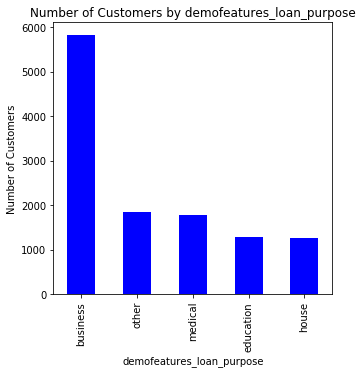

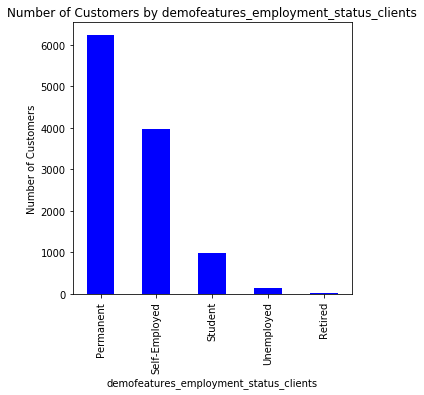

In [32]:
def plot_bars(Customers, cols):
    for col in cols:
        fig = plt.figure(figsize=(5,5)) # define plot area
        ax = fig.gca() # define axis    
        counts = data5[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of Customers by' + ' ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Customers')# Set text for y axis
        plt.show()

plot_cols = ['demofeatures_level_of_education', 'demofeatures_residence_state', 'demofeatures_loan_purpose', 'demofeatures_employment_status_clients']
plot_bars('Customers', plot_cols)   

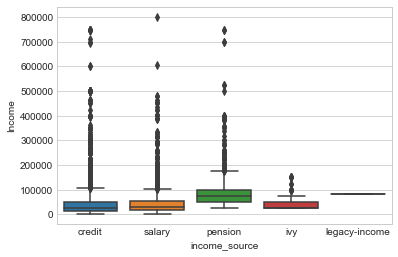

In [34]:
#analysis with boxplot
def plot_box(Incomes, col, col_y = 'Income'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=data5)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box('Incomes', 'income_source')  

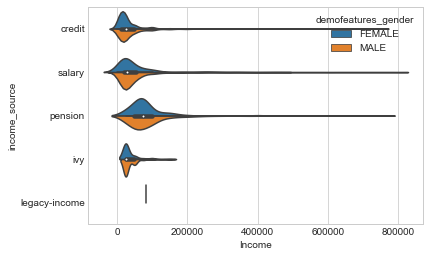

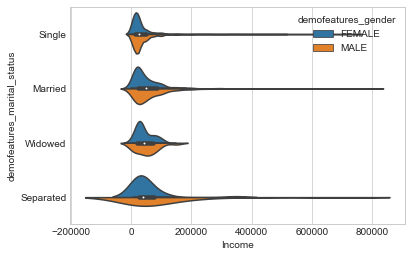

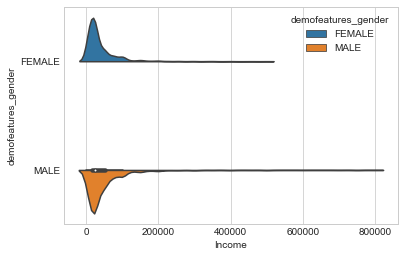

In [35]:
#analysis with violin plot
def plot_violin(income, cols, col_y = 'Income', hue_col = 'demofeatures_gender'):
    
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_y, col, data=data5, hue = hue_col, split = True)
        plt.xlabel(col_y) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols = ['income_source', 'demofeatures_marital_status', 'demofeatures_gender']

plot_violin('Income', num_cols)

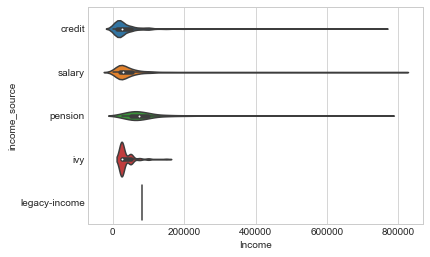

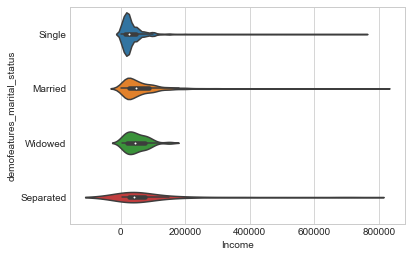

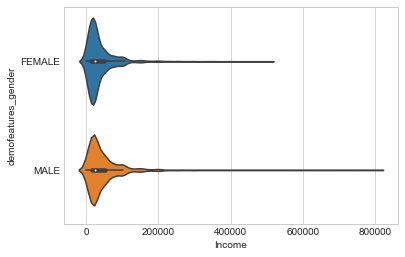

In [37]:
def plot_violin(income, cols, col_y = 'Income'):
    
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_y, col, data=data5 )
        plt.xlabel(col_y) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols = ['income_source', 'demofeatures_marital_status', 'demofeatures_gender']

plot_violin('income', num_cols)

plot count plots in stacked bar forms


Instead of your aggregate function, you can accomplish what you want with a groupby + pivot. 
df_plot = df.groupby(['class', 'survived']).size().reset_index().pivot(columns='class', index='survived', values=0)

class     First  Second  Third
survived                      
0            80      97    372
1           136      87    119
From here you can just plot it as a bar with the stacked=True argument
df_plot.plot(x=df_plot.index, kind='bar', stacked=True)





 plot two count plots beside one another
 
 import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

batData = ['a','b','c','a','c']
bowlData = ['b','a','d','d','a']

df=pd.DataFrame()
df['batting']=batData
df['bowling']=bowlData


fig, ax =plt.subplots(1,2)
sns.countplot(df['batting'], ax=ax[0])
sns.countplot(df['bowling'], ax=ax[1])
fig.show()

In [ ]:
@here this is key concept that I think should be made public.As we are developing pre-delinquency models for the final challenge, firstPaymentDefault would be known as would max_amount_taken and max_tenor_taken. But any feature that would occur after that on a loan timeline should be considered as feature leakage.This is very useful and should help everyone. I thought I would make this public as I have got a lot of questions surrounding it and I do not think my slides made it clear enough. (edited) 